**Step 1 훈련 세트와 테스트 세트 만들기**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# CSV 파일 불러오기
data = pd.read_csv('waterQuality1.csv')

# 데이터 확인
print(data.head())

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [2]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# 특성과 타겟 변수 분리
X = data.drop('is_safe', axis=1)  # 'is_safe' 열 제외한 모든 열 -특성
y = data['is_safe']              # 'is_safe' 타겟 변수

# 훈련 세트, 테스트 세트 분할 (80-20 비율 사용)
# random_state = 42 : 랜덤 시드 설정 (이 시드를 사용하여 데이터 분할 시, 동일한 코드를 다시 실행할 때마다 동일한 분할 결과 얻을 수 있음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((6399, 20), (1600, 20), (6399,), (1600,))

In [3]:
# 데이터 피처들의 기초 통계량 계산
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


**Step 2 데이터 탐색 및 시각화**

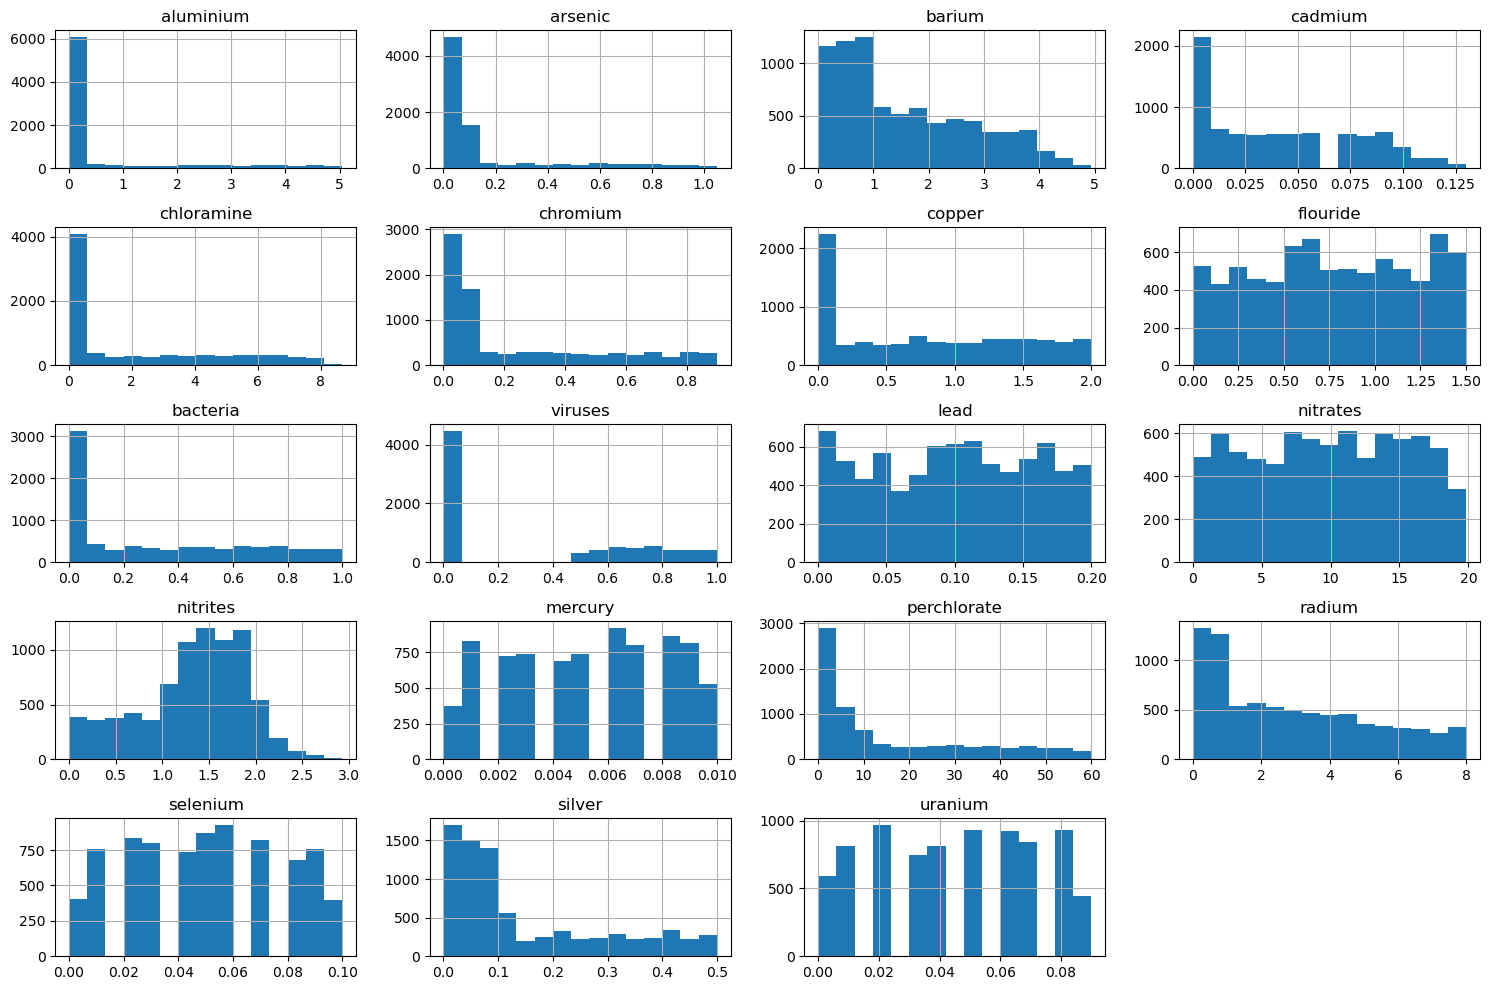

In [4]:
# 히스토그램 시각화
def plot_histograms(dataframe):
    dataframe.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    
plot_histograms(data)

<Figure size 1500x1000 with 0 Axes>

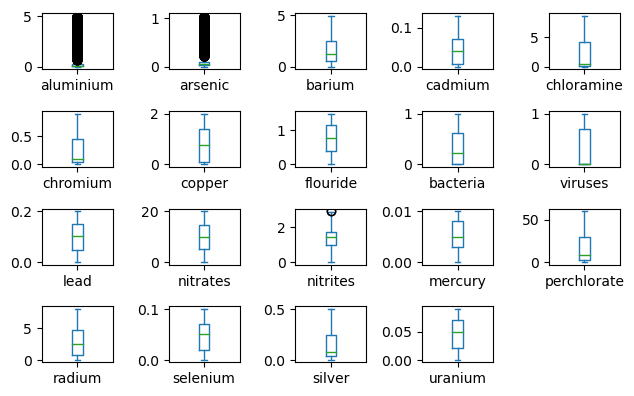

In [5]:
# 상자 그림(Box Plot) 시각화
def plot_boxplots(dataframe):
    plt.figure(figsize=(15, 10))
    dataframe.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

plot_boxplots(data)

In [6]:
print(data.dtypes)

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object


In [7]:
# type 변환
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
print(data.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object


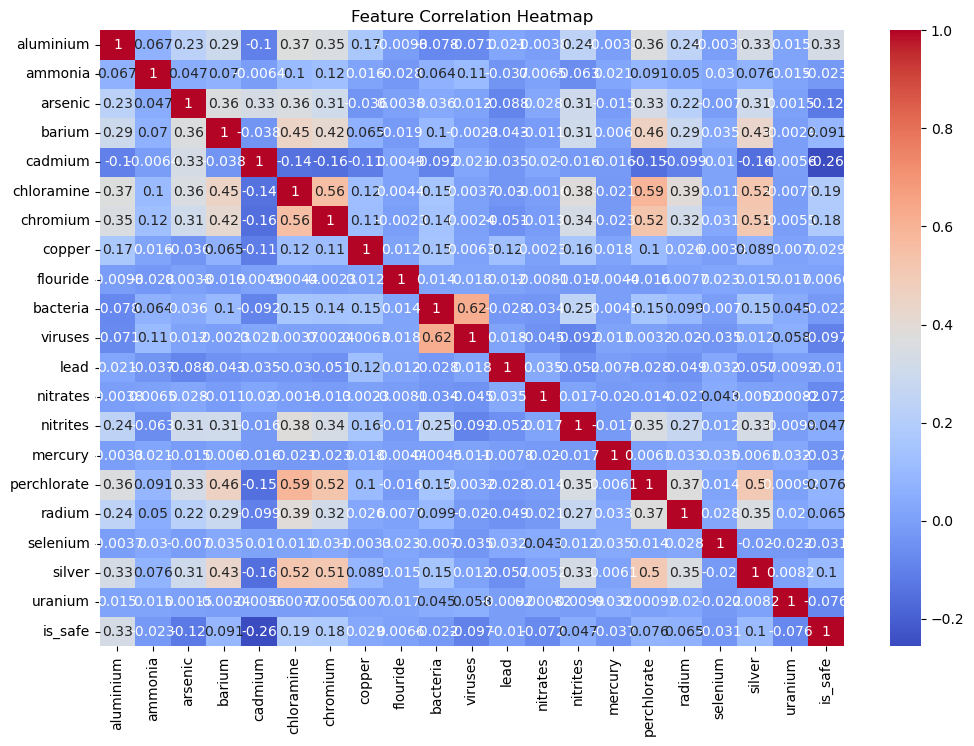

In [8]:
# 피처 간 상관 관계 시각화 (히트맵)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Step 3 데이터 전처리**

In [9]:
# 결측치 없음
# 범주형 데이터 없음

# 이상치 확인
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [10]:
# 아무리 정화를 잘해도 물에 각 성분이 0이기는 어려움
# 0인 값을 이상치로 분류하고 중간값으로 정제
# is_safe는 0과 1로 이루어져 있는 데이터이므로 건드리지 않음
data.iloc[:, :-1] = data.iloc[:, :-1].replace(0, data.iloc[:, :-1].median())

In [11]:
# 이상치 처리 결과
# 0값이 중간값으로 변경됨
print(data)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.05    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.05    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.040        2.00      0.09   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.

In [12]:
# true와 false 값으로 이루어진 is_safe를 제외한 피처들이 저장된 데이터 프레임 생성
# 숫자형 데이터만 가공하기 위함
num_features = data.drop('is_safe', axis=1)

**Step 4 데이터 스케일링**

In [13]:
#편향된 피처 리스트
skewed_features = ['aluminium', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'bacteria', 'viruses', 'perchlorate', 'radium', 'silver']

# 편향된 피처를 로그 변환하는 사용자 정의 변환기
def apply_log_transform(df, feature_list):
    for feature in feature_list:
        df[feature] = np.log(df[feature])

# 로그 변환 적용
apply_log_transform(num_features, skewed_features)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 적용하여 균일한 분포로 변환
# 균일한 분포는 서로 다른 스케일을 가진 피처들을 균일한 척도로 비교할 수 있게끔 함
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(num_features)

# 스케일러가 적용된 값으로 num_features 초기화
num_features = pd.DataFrame(scaled_features, columns=num_features.columns)

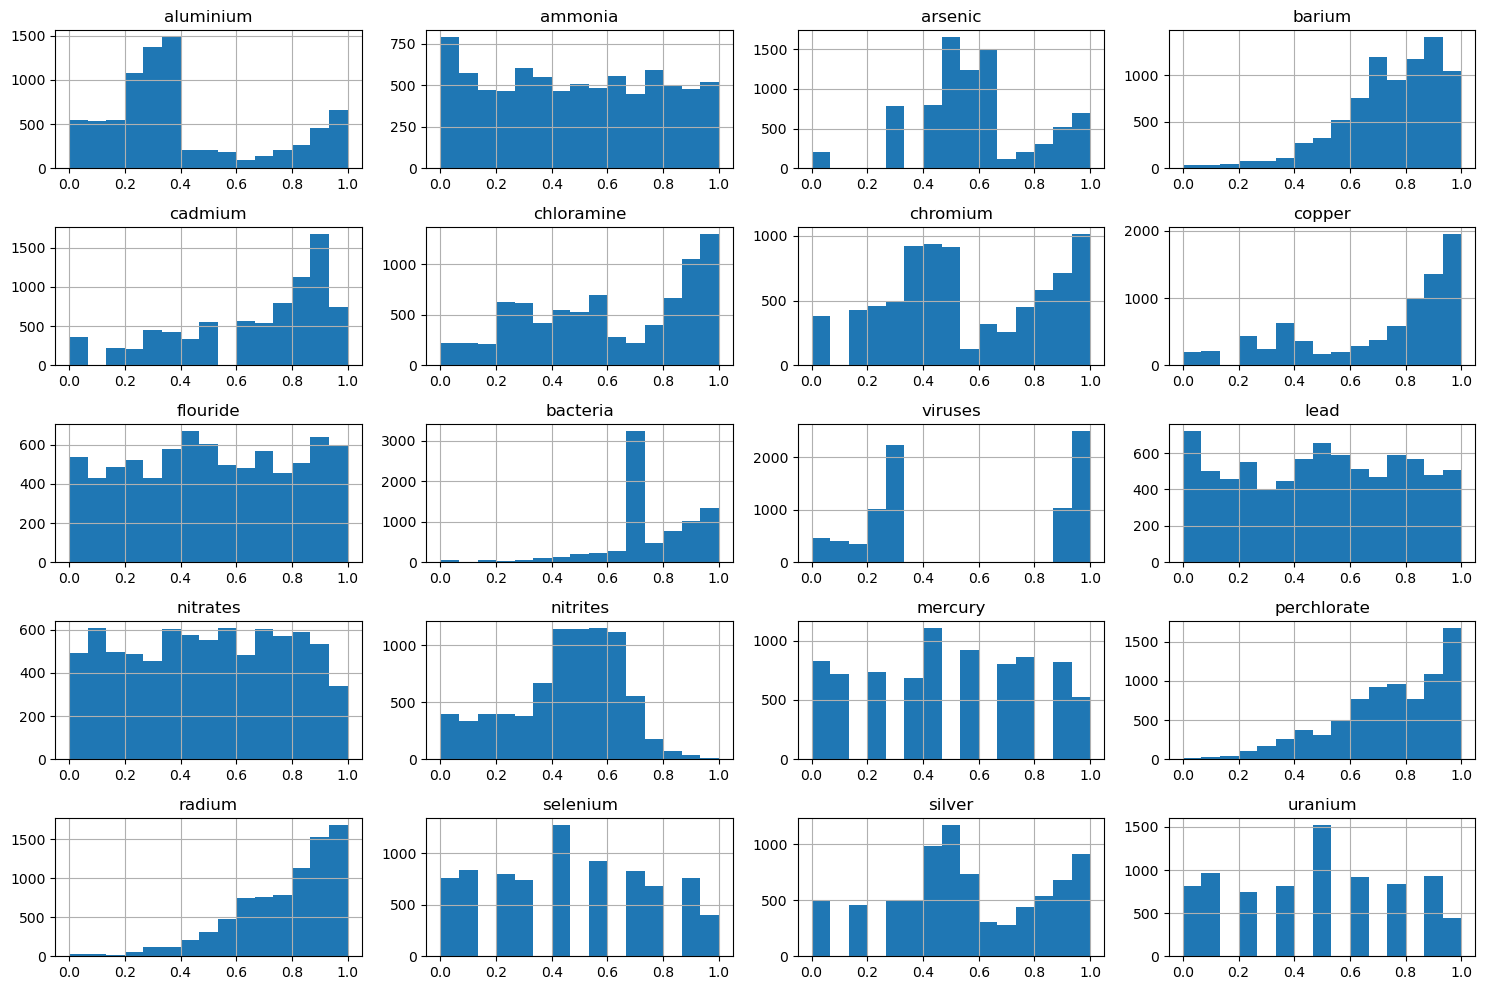

In [15]:
plot_histograms(num_features)